In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nbodykit.lab as nb
import fitsio as ft
import numpy as np

In [2]:
plt.rc('font', size=20)

Text(0.5, 1.0, 'NGC')

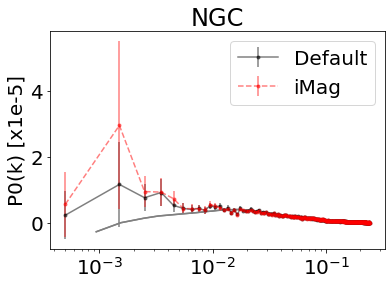

In [22]:
path  = '/home/mehdi/data/eboss/v7_1/results_NGC/'
pkout = lambda hemi, branch : 'pk_'+hemi+'_'+branch+'_512.json'

hemi  = 'NGC'
ttl   = ['Default', 'iMag']
mk    = ['.', '.']
c = ['k', 'r']
ls = ['-', '--']
for i,branch in enumerate(['systot', 'systot0.1']):
    pk_i = nb.ConvolvedFFTPower.load(path + pkout(hemi, branch))
    err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
    plt.errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+hemi+'_av.txt', usecols=(0, 1))
    plt.plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')

#plt.ylim(-0.5, 2.)    
plt.legend()
plt.xscale('log')
plt.ylabel('P0(k) [x1e-5]')
plt.title('NGC')

In [16]:
pk_i.poles['modes']

array([     3,      4,     24,     28,     72,     76,    132,    180,
          184,    308,    318,    378,    478,    550,    630,    710,
          834,    856,   1062,   1152,   1244,   1408,   1528,   1648,
         1780,   1992,   1976,   2272,   2474,   2614,   2750,   3006,
         3202,   3230,   3704,   3586,   4106,   4164,   4428,   4532,
         5052,   5152,   5304,   5812,   5748,   6276,   6338,   6918,
         6834,   7514,   7606,   7796,   8294,   8554,   8866,   9228,
         9636,   9724,  10272,  10704,  10780,  11468,  11496,  12156,
        12426,  12946,  12870,  13658,  14256,  14242,  15006,  15234,
        15778,  15940,  16768,  16884,  17640,  17916,  18312,  18924,
        19228,  20192,  19890,  21286,  21022,  21876,  22282,  23050,
        23254,  23946,  24542,  24972,  25644,  26096,  26600,  27580,
        27484,  28384,  28892,  29852,  29814,  31242,  31180,  31986,
        32796,  33288,  33584,  34652,  35432,  35350,  36778,  37174,
      